In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('weatherHistory.csv')

FileNotFoundError: ignored

In [ ]:
data.head(10)

,FormattedDate,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
7,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
8,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
data.corr()

<ipython-input-5-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992360,-0.637320,0.024839,0.025926,0.378762,NaN,-0.038860
Apparent Temperature (C),0.992360,1.000000,-0.607937,-0.044258,0.021782,0.365671,NaN,-0.036382
Humidity,-0.637320,-0.607937,1.000000,-0.238003,0.005710,-0.333945,NaN,0.011788
Wind Speed (km/h),0.024839,-0.044258,-0.238003,1.000000,0.119101,0.137669,NaN,-0.048256
Wind Bearing (degrees),0.025926,0.021782,0.005710,0.119101,1.000000,0.063532,NaN,-0.007891
Visibility (km),0.378762,0.365671,-0.333945,0.137669,0.063532,1.000000,NaN,0.004923
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.038860,-0.036382,0.011788,-0.048256,-0.007891,0.004923,NaN,1.000000


In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data['FormattedDate'] = data['FormattedDate'].astype(str)

In [ ]:
df_date =  data['FormattedDate'].str.split(' ', expand=True)

In [ ]:
data['FormattedDate'] = df_date [0]

In [ ]:
data['FormattedDate'] = pd.to_datetime(data['FormattedDate'])

In [ ]:
data['FormattedDate'] = data['FormattedDate'].map(lambda date: 30*(date.month-1) + date.day)

In [ ]:
data['FormattedDate'] = data['FormattedDate'].values

In [ ]:
df = data.groupby(['FormattedDate'])['Temperature (C)']. mean().reset_index()
df

,FormattedDate,Temperature (C)
0,1,-0.150270
1,2,0.106019
2,3,-1.954552
3,4,-3.419020
4,5,-1.921335
...,...,...
355,357,-2.049151
356,358,-2.886458
357,359,-2.728974
358,360,-2.095216


In [ ]:
# X_train = np.array(data['FormattedDate'][:80000])
# Y_train = np.array(data['Temperature (C)'][:80000])
# X_test = np.array(data['FormattedDate'][80000:])
# Y_test = np.array(data['FormattedDate'][80000:])
# Y_train = Y_train.reshape(-1,1)
# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)
# Y_test = Y_test.reshape(-1,1)

In [ ]:
X = df['FormattedDate'].values
Y = df['Temperature (C)'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)


In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, train_size = 0.8 )
Y_train = Y_train.reshape(-1,1)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [ ]:
X_train

array([[ 15],
       [  2],
       [214],
       [ 56],
       [ 32],
       [191],
       [219],
       [158],
       [ 85],
       [263],
       [ 69],
       [ 46],
       [159],
       [235],
       [182],
       [314],
       [ 62],
       [313],
       [295],
       [135],
       [343],
       [319],
       [133],
       [ 99],
       [ 92],
       [104],
       [ 45],
       [198],
       [151],
       [274],
       [  5],
       [167],
       [134],
       [346],
       [123],
       [340],
       [ 34],
       [ 78],
       [ 13],
       [192],
       [212],
       [244],
       [ 57],
       [ 71],
       [336],
       [291],
       [206],
       [149],
       [241],
       [325],
       [ 94],
       [ 61],
       [223],
       [141],
       [282],
       [211],
       [ 10],
       [164],
       [290],
       [ 25],
       [ 14],
       [272],
       [127],
       [ 41],
       [152],
       [299],
       [173],
       [316],
       [ 74],
       [276],
       [ 58],
      

In [ ]:
Y_train

array([[ 1.58962191],
       [ 0.10601852],
       [21.91099537],
       [ 3.35474537],
       [-0.64984568],
       [22.49436728],
       [21.13873457],
       [20.3123071 ],
       [ 7.99494949],
       [15.48481481],
       [ 3.41716821],
       [ 0.24155093],
       [21.13973765],
       [22.71284722],
       [21.65709877],
       [ 6.73452932],
       [ 4.35787037],
       [ 5.91917438],
       [10.88961686],
       [17.55185185],
       [ 2.0255787 ],
       [ 6.38209877],
       [16.61458333],
       [13.02349537],
       [11.19949846],
       [11.02503858],
       [ 0.33572531],
       [24.71342593],
       [16.69650849],
       [14.07699074],
       [-1.92133488],
       [22.35844907],
       [17.45821759],
       [ 0.1410108 ],
       [14.89174383],
       [ 4.24347994],
       [ 1.33854167],
       [ 6.7408179 ],
       [ 1.21759259],
       [23.11983025],
       [23.52791005],
       [20.7275463 ],
       [ 2.95347222],
       [ 5.4308642 ],
       [ 5.00219907],
       [ 8

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation = "relu"),
    tf.keras.layers.Dense(500, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear")
])


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam (learning_rate = 0.01 ),
              loss = tf.keras.losses.MeanAbsoluteError())

In [ ]:
history = model.fit(X_train , Y_train, epochs = 300)

Epoch 1/300
9/9 [==============================] - 1s 5ms/step - loss: 17.1871
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 7.8891
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 7.9862
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 7.7823
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 7.5730
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 7.6210
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 7.5551
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 7.4492
Epoch 9/300
9/9 [==============================] - 0s 4ms/step - loss: 7.4610
Epoch 10/300
9/9 [==============================] - 0s 5ms/step - loss: 7.3217
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - loss: 7.4349
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 7.4520
Epoch 13/300
9/9 [==============================] - 0s 5ms/s

Text(0, 0.5, 'Loss')

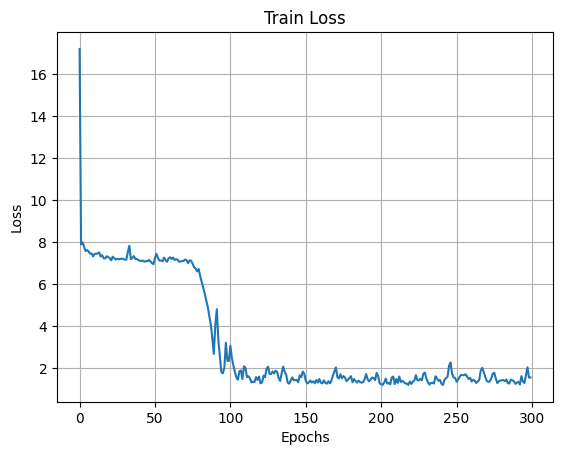

In [ ]:
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.grid()
plt.xlabel ('Epochs')
plt.ylabel('Loss')

4/4 [==============================] - 0s 3ms/step


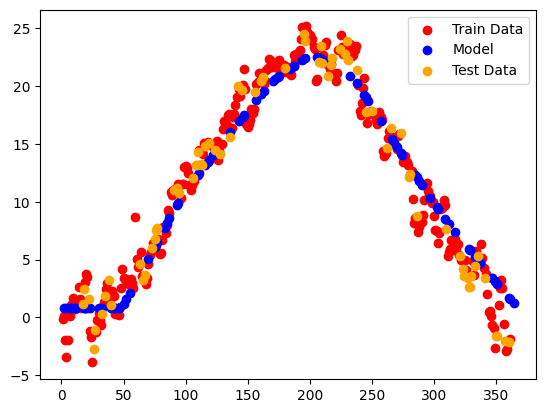

In [ ]:
plt.scatter(X_train,Y_train, c = "red", label = "Train Data")
X = np.random.randint(1,365,100, dtype=int)
X = X.reshape(-1,1)
# print(X)
Y = model.predict(X)
plt.scatter(X , Y, c ="blue", label = "Model")
plt.scatter(X_test , Y_test , c ="orange", label = "Test Data")
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

model.save("weather.h5")



NameError: ignored